<a href="https://colab.research.google.com/github/mbhaskar1/ML-Coursera/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

For this problem, we'll be creating our own dataset to test logistic regression on. Specifically, we will use the ellipse, $x^2+xy+2y^2+x+3y=5$. Points inside the ellipse will be assigned a class of $0$ and points outside the ellipse will be assigned a class of $1$

In [2]:
NUM_POINTS = 250
MIN_X = -3
MAX_X = 3
MIN_Y = -3
MAX_Y = 3

def target(x, y):
  return 0 if x*x + x*y + 2*y*y + x + 3*y <= 5 else 1

data = []
for i in range(NUM_POINTS):
  x = np.random.uniform(MIN_X, MAX_X)
  y = np.random.uniform(MIN_Y, MAX_Y)
  data.append([x, y, target(x, y)])

data = np.array(data)
print('First 10 Entries:')
print(data[:10])

First 10 Entries:
[[ 2.43245323 -2.82625847  1.        ]
 [ 2.05738559  1.91319489  1.        ]
 [ 0.66009745 -0.15471748  0.        ]
 [ 1.63262963 -0.23581105  0.        ]
 [ 0.16720767 -1.5211646   0.        ]
 [-1.4431274  -2.98738223  1.        ]
 [-0.64225176 -1.18127062  0.        ]
 [-2.43049532 -2.18594448  1.        ]
 [ 1.31085263  2.68070796  1.        ]
 [-1.16266826 -0.33748071  0.        ]]


Let's visualize our dataset using the seaborn module

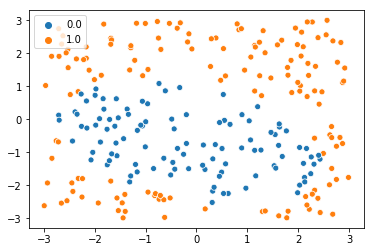

In [3]:
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=data[:, 2])

Now, we setup to perform logistic regression

In [0]:
X = data[:, :2]
y = data[:, 2].reshape(NUM_POINTS, 1)

X = np.append(X, np.multiply(X[:, 0], X[:, 0]).reshape(NUM_POINTS, 1), axis=1)  # x*x
X = np.append(X, np.multiply(X[:, 0], X[:, 1]).reshape(NUM_POINTS, 1), axis=1)  # x*y
X = np.append(X, np.multiply(X[:, 1], X[:, 1]).reshape(NUM_POINTS, 1), axis=1)  # y*y

m = NUM_POINTS
n = X.shape[1]

X = np.append(np.ones((m, 1)), X, axis=1)  # Add bias feature

theta = np.random.uniform(size=(n+1, 1))

L = 0.01

def h(theta, X):
  return 1/(1 + np.exp(-np.matmul(X, theta)))

def J(theta, X, y):
  return ((-1/y.shape[0]) * (np.matmul(np.transpose(y), np.log(np.maximum(h(theta, X), 0.0001))) + np.matmul(np.transpose(1-y), np.log(np.maximum(1 - h(theta, X), 0.0001)))) + (L/(2*m)) * np.matmul(theta[1:].T, theta[1:]))[0][0]

def grad(theta, X, y):
  reg = (L/m)*theta
  reg[0, 0] = 0
  return (1/m) * np.matmul(np.transpose(X), h(theta, X) - y) + reg

Logistic Regression:

In [5]:
NUM_ITERATIONS = 25000
LEARNING_RATE = 0.01

PRINT_EVERY = 1000

cost = [J(theta, X, y)]

for i in range(1, NUM_ITERATIONS + 1):
  theta = theta - LEARNING_RATE * grad(theta, X, y)
  cost.append(J(theta, X, y))
  if i % PRINT_EVERY == 0:
    print(f'ITERATION {i}: {cost[-1]}')

ITERATION 1000: 0.29816504345450934
ITERATION 2000: 0.23812620620272978
ITERATION 3000: 0.20426068268914738
ITERATION 4000: 0.18234929062416128
ITERATION 5000: 0.16685669467569159
ITERATION 6000: 0.1552110485706501
ITERATION 7000: 0.14606098664000372
ITERATION 8000: 0.1386291115388048
ITERATION 9000: 0.1324360660115892
ITERATION 10000: 0.12716960376561592
ITERATION 11000: 0.12261710242678561
ITERATION 12000: 0.11862838431471406
ITERATION 13000: 0.11509408130405807
ITERATION 14000: 0.11193245361454204
ITERATION 15000: 0.10908103926734021
ITERATION 16000: 0.10649118287822938
ITERATION 17000: 0.1041243445418872
ITERATION 18000: 0.10194954491843931
ITERATION 19000: 0.09994155622985469
ITERATION 20000: 0.0980795953220944
ITERATION 21000: 0.09634636228354124
ITERATION 22000: 0.09472732170906
ITERATION 23000: 0.09321015745315088
ITERATION 24000: 0.09178435347369011
ITERATION 25000: 0.09044086769295805


Let's graph the decision boundary

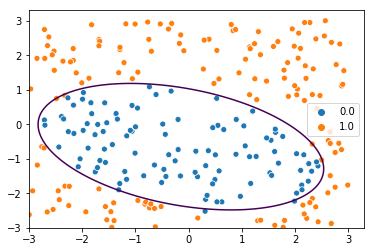

In [6]:
step = 0.02
xx, yy = np.meshgrid(np.arange(-3, 3, step), np.arange(-3, 3, step))
d = np.c_[xx.ravel(), yy.ravel()]
mesh_m = len(xx.ravel())
d = np.append(d, np.multiply(d[:, 0], d[:, 0]).reshape(mesh_m, 1), axis=1)  # x*x
d = np.append(d, np.multiply(d[:, 0], d[:, 1]).reshape(mesh_m, 1), axis=1)  # x*y
d = np.append(d, np.multiply(d[:, 1], d[:, 1]).reshape(mesh_m, 1), axis=1)  # y*y
d = np.append(np.ones((mesh_m, 1)), d, axis=1)  # bias

Z = h(theta, d)
Z = Z.reshape(xx.shape)

sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=data[:, 2])
plt.contour(xx, yy, Z, levels=[0.5])